# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

warnings.filterwarnings("ignore")

In [107]:
rawData = pd.read_csv('./Titanic-Dataset.csv')
rawData.shape

(891, 12)

In [108]:
rawData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- **PassengerId**: Id único del pasajero.
- **Survived**: Si el pasajero sobrevivió al naufragio, donde 0=no y 1=si.
- **Pclass**: Clase a la que pertenecía el pasajero: 1, 2 o 3.
- **Name**: Nombre del pasajero.
- **Sex**: Sexo del pasajero.
- **Age**: Edad del pasajero.
- **SibSp**: Número de herman@s / cónyuges a bordo del Titanic.
- **Parch**: Número de padres/hijos a bordo del Titanic.
- **Ticket**: Número de tiquete.
- **Fare**: Tarifa pagada por el tiquete.
- **Cabin**: Número de cabina del pasajero.
- **Embarked**: Puerto en el que embarcó el pasajero. C = Cherbourg, Q = Queenstown, S = Southampton.

In [109]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ya podemos deducir que **Age**, **Cabin** & **Embarked** tienen algunos valores nulos, mas adelante confirmaremos y decidiremos que hacer con ellos.

In [110]:
rawData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
rawData.duplicated().sum()

0

No tenemos filas duplicadas

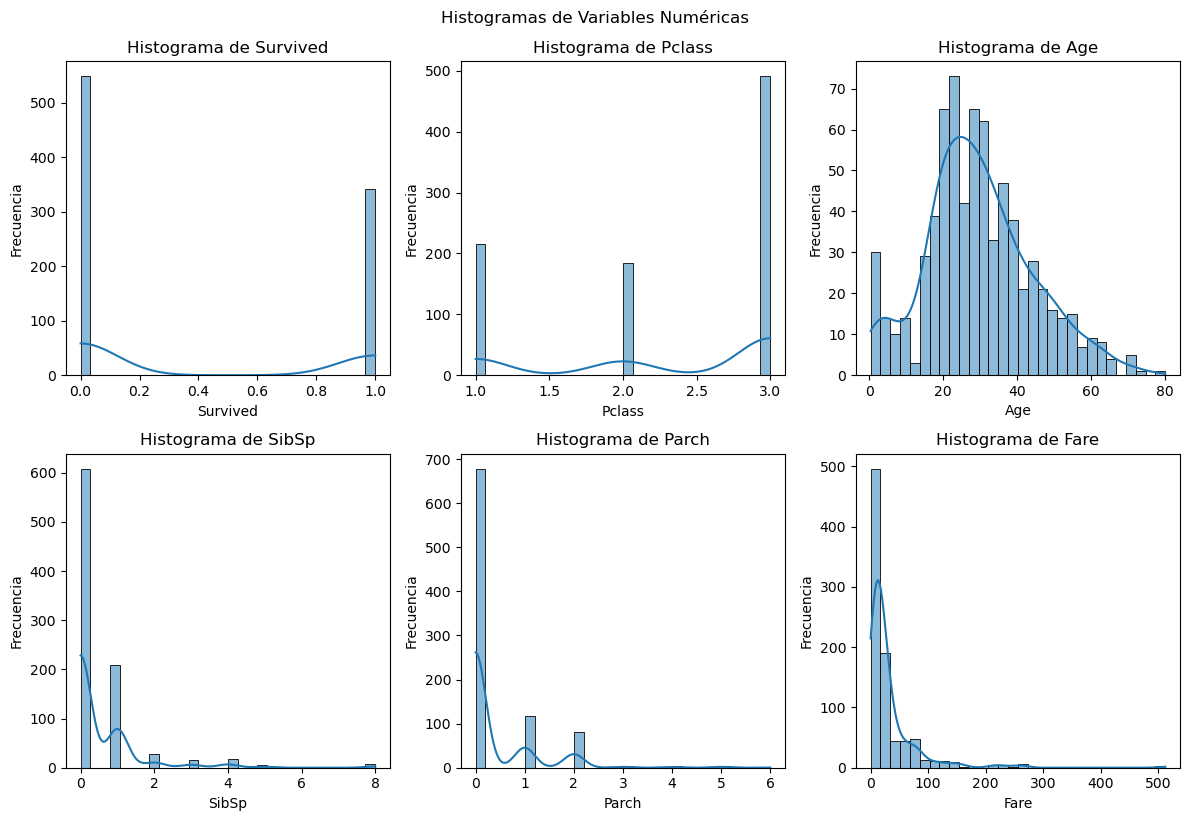

In [112]:
num_vars = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 8))

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(rawData[var], kde=True, bins=30)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Histogramas de Variables Numéricas', y=1.02)
plt.show()

Mediante los histogramas vemos la distribución de los datos y su frecuencia o conteo para cada variable numerica.

In [113]:
survival_counts = rawData['Survived'].value_counts().sort_index()
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

Aquí vemos el número exacto y la distribución (0=549, 1=342) de la variable que nos interesa **Survived** y a continuación graficaremos las relaciones que otras variables/columnas tienen con esta.

In [114]:
rawData['Survived'] = rawData['Survived'].map({0: 'No', 1: 'Yes'}) #Para poder utilizar Survived como hue tenemos que hacerlo categórico, luego de gráficar lo volveremos númerico nuevamente.

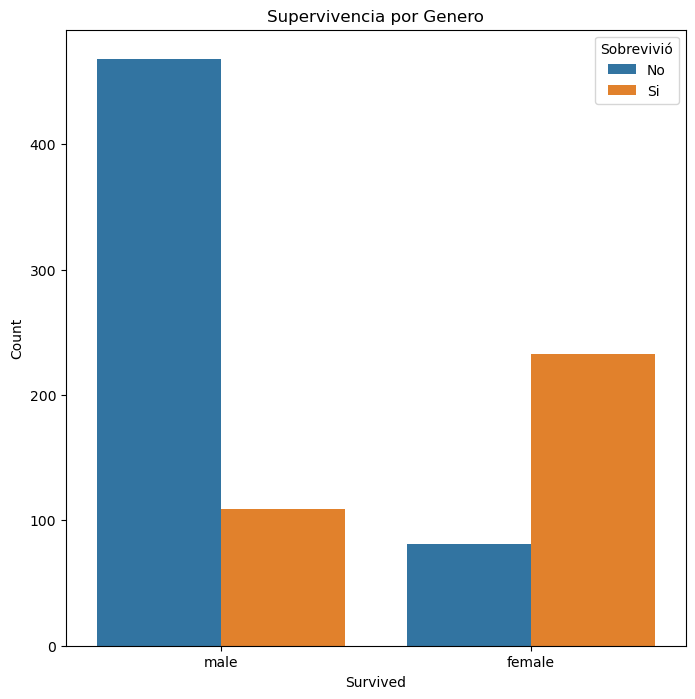

In [115]:
plt.figure(figsize=(8, 8))
sns.countplot(data=rawData, x='Sex', hue='Survived')
plt.title('Supervivencia por Genero')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sobrevivió', labels=['No', 'Si'])
plt.show()

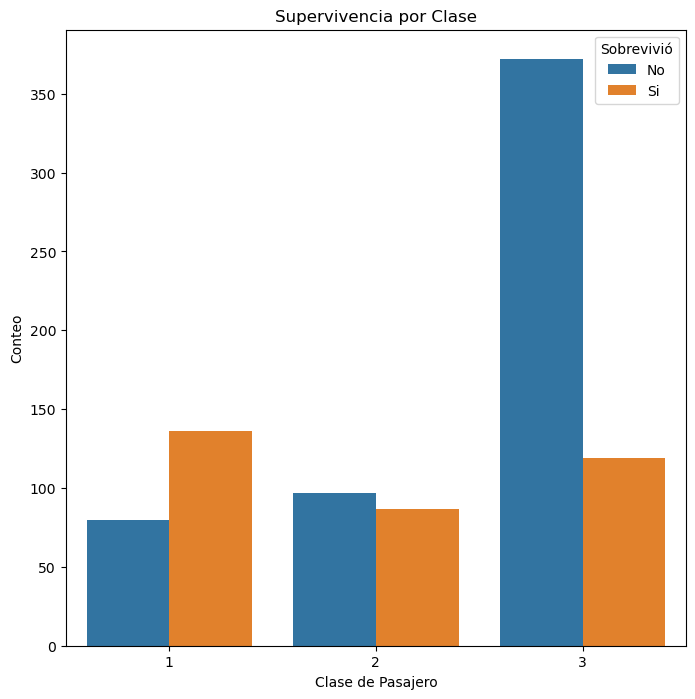

In [116]:
plt.figure(figsize=(8, 8))
sns.countplot(data=rawData, x='Pclass', hue='Survived')
plt.title('Supervivencia por Clase')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Conteo')
plt.legend(title='Sobrevivió', labels=['No', 'Si'])
plt.show()

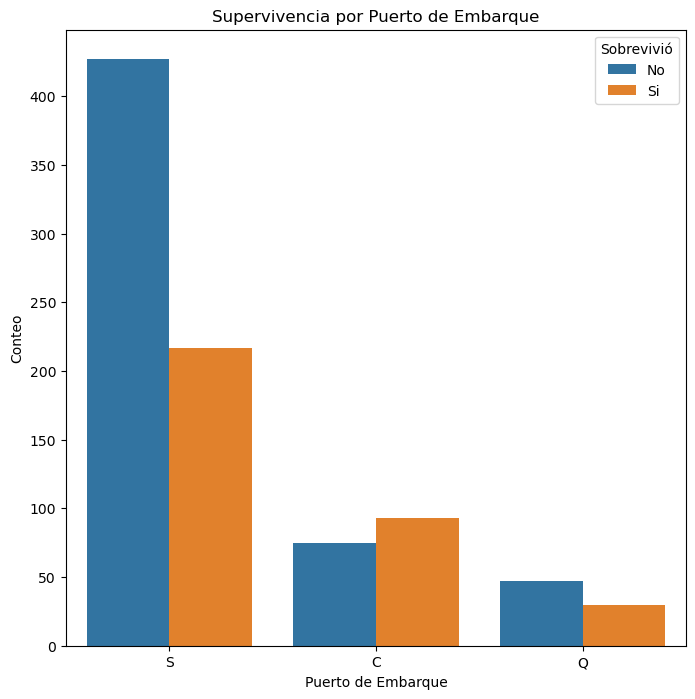

In [117]:
plt.figure(figsize=(8, 8))
sns.countplot(data=rawData, x='Embarked', hue='Survived')
plt.title('Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Conteo')
plt.legend(title='Sobrevivió', labels=['No', 'Si'])
plt.show()

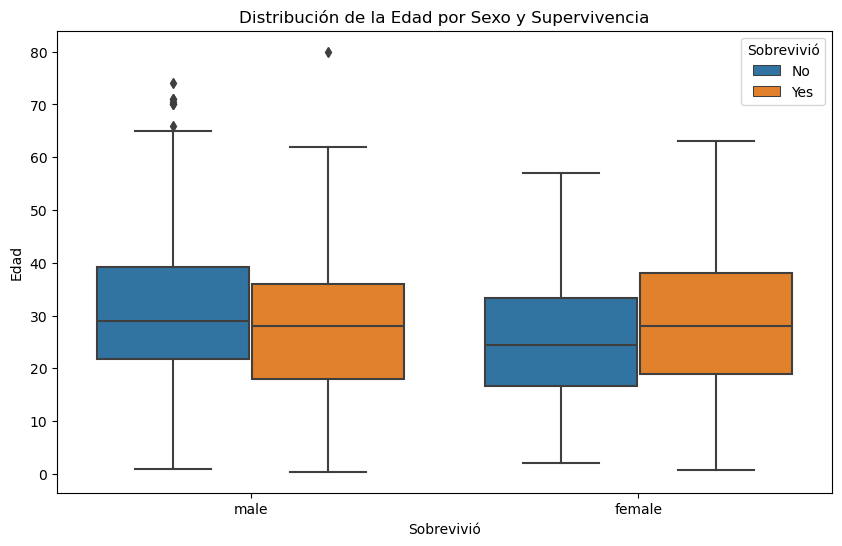

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rawData, x='Sex', y='Age', hue='Survived')
plt.title('Distribución de la Edad por Sexo y Supervivencia')
plt.xlabel('Sobrevivió')
plt.ylabel('Edad')
plt.legend(title='Sobrevivió')
plt.show()


Estas gráficas nos dicen muchas cosas, entre las cuales podemos resaltar que:
- Sobrevivieron el doble de mujeres que de hombres
- Sobrevivieron mas personas pertenecientes a Clase 1.
- El puerto donde embarcaron mas personas fue Southampton, de allí, poco mas de 200 sobrevivieron.
- Sobrevivió un hombre de 80 años aproximadamente.
- No sobrevivieron mujeres mayores de 65 años aproximadamente.

In [119]:
rawData['Survived'] = rawData['Survived'].map({'No': 0, 'Yes': 1})

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [120]:
rawData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aquí vemos cuantos valores nulos tiene cada columna, y determinamos que imputación de datos usaremos en cada una, para la columna **Age** será la *media*. En el caso de **cabin**, son demasiadas filas vacias y optamos por *dropear* la columna. Finalmente en el caso de **Embarked** será la *moda*.

In [156]:
data = rawData.copy() #Copia dataset
data['Age'] = data['Age'].fillna(data['Age'].mean()) #Imputación por media de Edad
data.drop(columns=['Cabin'], inplace=True) #Eliminación columna Cabin
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) #Imputación por moda del puerto de embarcación

In [157]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [158]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Observando en este punto el dataset, decidimos *eliminar/dropear* las columnas que no nos sirven, tal como: **PassengerId**, **Name** y **Ticket**. Ademas, vemos que tenemos que codificar las columnas categóricas **sex** y **embarked** para que puedan ser aprovechadas por el modelo (aplicaremos onehot encoding en ambas).

In [159]:
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True) #Eliminamos las columnas

In [160]:
data = pd.get_dummies(data, columns=['Embarked', 'Sex'], dtype='int64') #Codificamos las variables categoricas nominales

In [161]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
 9   Sex_female  891 non-null    int64  
 10  Sex_male    891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

### Características de interes
- Estamos interesados en **Survived** y la idea es predecir si una persona sobrevive basandonos en sus características.

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [163]:
X = data.drop(columns='Survived',axis=1)
y = data['Survived']

In [164]:
X

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0
4,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1,1,0
888,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1


In [165]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Dividimos 20%test/80%train

# 5. Entrenar el modelo configurando los diferentes hiperparámetros.


In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [168]:
# Desempeño del modelo de regresión
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       119
           1       0.79      0.68      0.73        60

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


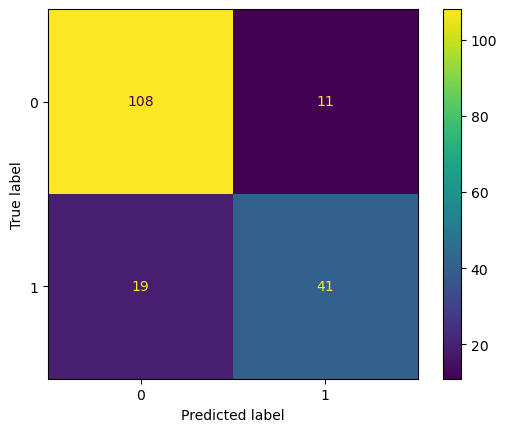

In [169]:
#Matriz de Confusión del modelo
cm=confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

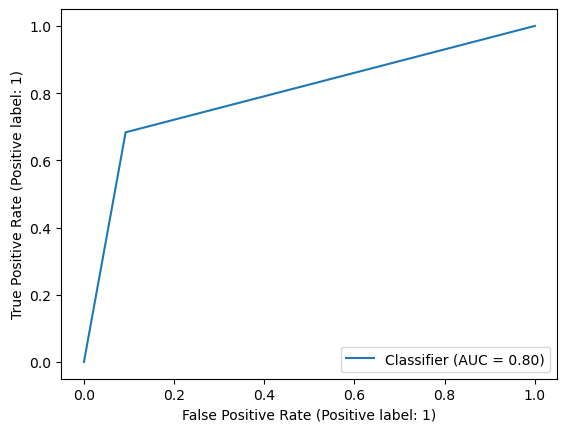

In [170]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

Los datos de test estan conformados por el 20% de todos los registros del dataset y equivale a 179 registros.

### Del desempeño del modelo podemos ver que:

**Precision:**

- Para Survived = 0, la precisión es del 85%, lo que indica que el 85% de las instancias clasificadas como no sobrevivientes realmente no sobrevivieron.
- Para Survived = 1, la precisión es del 79%, lo que indica que el 79% de las instancias clasificadas como sobrevivientes realmente sobrevivieron.

**Recall:**

- Para Survived = 0, el recall es del 91%, lo que indica que el 91% de las instancias que realmente no sobrevivieron se identificaron correctamente.
- Para Survived = 1, el recall es del 68%, lo que indica que el 68% de las instancias que realmente sobrevivieron se identificaron correctamente.

**F-1 Score:**

- Para Survived = 0, el puntaje F1 es 0.88. Esto significa que el modelo tiene una buena precisión y recall para predecir correctamente los casos donde una persona no sobrevivió.
- Para Survived = 1, el puntaje F1 es 0.73. Esto indica que el modelo tiene una precisión y recall aceptables para predecir los casos donde una persona sobrevivió, pero podría haber margen de mejora.

**Accuracy:**

La precisión general del modelo es del 83%, lo que indica que el 83% de las predicciones son correctas.

### De la matriz de confusión podemos ver que:

**Matriz de Confusión:**
El modelo clasificó correctamente:

- 108 instancias que realmente no sobrevivieron (verdaderos negativos).
- 41 instancias que realmente sobrevivieron (verdaderos positivos).

El modelo clasificó incorrectamente:

- 11 instancias como sobrevivientes cuando en realidad no lo eran (falsos positivos).
- 19 instancias como no sobrevivientes cuando en realidad sí lo eran (falsos negativos).

### De la Curva ROC podemos ver que:

**Curva ROC**
- La AUC (Área Bajo la Curva) es de 0.80, lo que indica una buena capacidad del modelo para distinguir entre las clases de sobrevivientes y no sobrevivientes.